<a href="https://colab.research.google.com/github/HUGOBROWNING/Boston-Consulting-Group-Tasks/blob/main/BCG_Task_4_(Predictions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/data_for_predictions.csv'
import pandas as pd
data = pd.read_csv(path)
data.head()

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


In [ ]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.0,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = data.dropna().drop_duplicates()

target_drop = ['id', 'churn', 'tenure']

X = data.drop(columns = target_drop, axis =1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import numpy as np

numerical_features = X_train.select_dtypes(include=np.number).columns
categorical_features = X_train.select_dtypes(include='bool').columns

pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder = 'passthrough')

model = RandomForestClassifier(n_estimators=100, random_state=42)

X_train = pre.fit_transform(X_train)
X_test = pre.transform(X_test)

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8993839835728953


In [ ]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.74      0.06      0.10       305

    accuracy                           0.90      2922
   macro avg       0.82      0.53      0.53      2922
weighted avg       0.88      0.90      0.86      2922



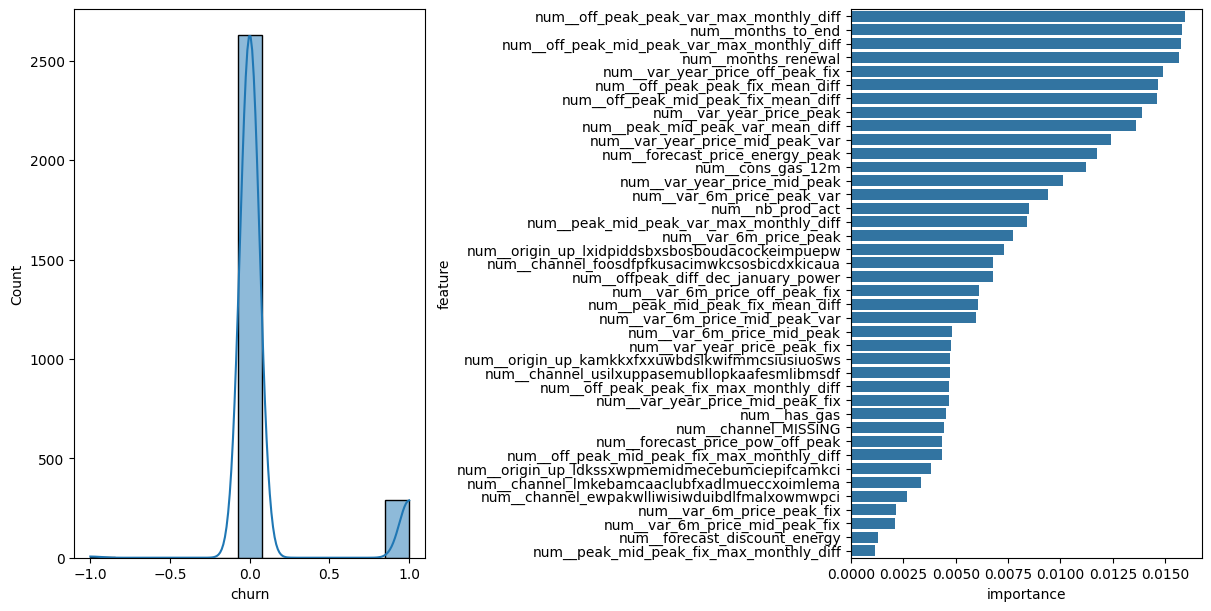

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
axes = axes.flatten()

sns.histplot(y_test - y_pred, kde = True, ax = axes[0])

feat_imp = pd.DataFrame({'feature': pre.get_feature_names_out(), 'importance': model.feature_importances_})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

feat_imp = feat_imp.tail(40)

sns.barplot(x='importance', y='feature', data=feat_imp, ax=axes[1])

plt.show()

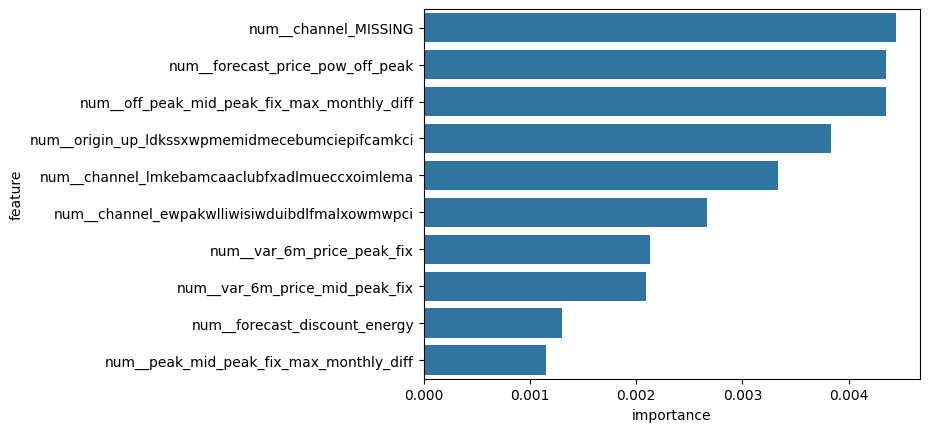

In [ ]:
feat_imp = feat_imp.tail(10)

sns.barplot(x='importance', y='feature', data=feat_imp)
plt.show()

## Model Evaluation and Performance Analysis

This section explains the choice of evaluation metrics, assesses the model's performance, and emphasizes the clarity of the code.

### Evaluation Metrics

The evaluation metrics used in this analysis are:

*   **Accuracy:** This metric measures the overall proportion of correct predictions (both true positives and true negatives). It's a straightforward metric that gives a general idea of the model's performance.
*   **Classification Report:** This report provides a more detailed breakdown of the model's performance for each class (churned and non-churned customers). It includes:
    *   **Precision:** The proportion of true positive predictions among all positive predictions. High precision indicates a low rate of false positives.
    *   **Recall (Sensitivity):** The proportion of true positive predictions among all actual positive cases. High recall indicates a low rate of false negatives.
    *   **F1-score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance, especially useful when dealing with imbalanced datasets.
    *   **Support:** The number of actual occurrences of each class in the dataset.

We chose these metrics because they provide a comprehensive view of the model's performance, especially in the context of a classification problem like churn prediction. While accuracy gives a general overview, the classification report helps to understand how well the model performs for each class, which is crucial when dealing with potentially imbalanced data where predicting the minority class (churn) is often more important.

### Model Performance Assessment

Based on the classification report, the model achieved an overall accuracy of approximately 90%. However, it's important to look beyond just accuracy, especially in imbalanced datasets where the majority class dominates.

The classification report shows that the model has very high precision for the '0' class (non-churn), meaning that when it predicts a customer will not churn, it is almost always correct. The recall for the '0' class is also very high, indicating that the model is good at identifying most of the non-churning customers.

For the '1' class (churn), the precision is 0.74 and the recall is 0.06. This means that while 74% of the customers predicted to churn actually did churn (precision), the model only identified 6% of the actual churned customers (recall). The low recall for the churn class indicates that the model is missing a significant number of customers who are actually churning.

Given the low recall for the churn class, the model's performance is **not entirely satisfactory** for a churn prediction task where identifying churning customers is often the primary goal. A model with higher recall for the churn class would be more valuable for implementing targeted retention strategies. The high accuracy is primarily driven by the model's strong performance on the majority class (non-churn).

### Code Clarity and Explanations

The code in this notebook is presented with clear variable names, comments, and explanations to enhance readability and understanding. Each step of the process, from data loading and preprocessing to model training and evaluation, is logically organized and explained. Markdown cells are used to provide context and elaborate on the choices made. The use of `display()` for showing DataFrame heads and the inclusion of plots further contribute to the clarity of the work.